In [33]:
# Ensemble : Model들을 같이 엮어서 사용하는 방법
library(randomForest)
library(caret)
library(party)

In [60]:
# Sampling
set.seed(1234)
samp <- createDataPartition(iris$Species, p=0.7, list=F)
# 학습용 데이터 만들기
data.tr <- iris[samp,]

# 검증용 데이터 만들기
data.test <- iris[-samp,]

model.ctree <- ctree(Species ~ ., data=data.tr)

# 문제 및 정답 만들기
x <- subset(data.test, select = -Species)
y <- data.test$Species


In [38]:
pred <- predict(model.ctree, x)
pred

[1] setosa     setosa     setosa     setosa     setosa     setosa    
 [7] setosa     setosa     setosa     versicolor setosa     setosa    
[13] setosa     setosa     versicolor versicolor versicolor versicolor
[19] versicolor versicolor versicolor versicolor virginica  versicolor
[25] versicolor virginica  versicolor versicolor versicolor versicolor
[31] virginica  virginica  virginica  virginica  virginica  virginica 
[37] versicolor virginica  virginica  virginica  virginica  virginica 
[43] virginica  virginica  virginica 
Levels: setosa versicolor virginica

In [39]:
mean(pred == y)
table(pred, y)

[1] 0.8888889

            y
pred         setosa versicolor virginica
  setosa         13          0         0
  versicolor      2         13         1
  virginica       0          2        14

In [41]:
# 학습시키기
model.rf <- randomForest(Species ~ ., data = data.tr, ntree=100)

In [42]:
# 검증하기
pred <- predict(model.rf, x)

In [43]:
# 예측력과 우분류표
mean(pred == y)
table(pred, y)

[1] 0.9333333

            y
pred         setosa versicolor virginica
  setosa         15          0         0
  versicolor      0         12         0
  virginica       0          3        15

---
### 교통사고 예측하기 (회귀식과 RandomForest 예측 비교)

In [46]:
seoul <- read.csv("../R_yang/newSeoul2019.csv")
head(seoul)

년도,월,자치구명,발생건수,사망자수,부상자수
2011,1,종로구,115,2,165
2011,2,종로구,99,0,134
2011,3,종로구,116,0,162
2011,4,종로구,110,1,153
2011,5,종로구,122,0,157
2011,6,종로구,116,3,163


In [114]:
# 종로구 데이터셋 만들기
JongRo <- seoul[seoul$자치구명 == "종로구",]

nrow(JongRo)

[1] 108

In [115]:
head(JongRo)
str(JongRo)

년도,월,자치구명,발생건수,사망자수,부상자수
2011,1,종로구,115,2,165
2011,2,종로구,99,0,134
2011,3,종로구,116,0,162
2011,4,종로구,110,1,153
2011,5,종로구,122,0,157
2011,6,종로구,116,3,163


'data.frame':	108 obs. of  6 variables:
 $ 년도    : int  2011 2011 2011 2011 2011 2011 2011 2011 2011 2011 ...
 $ 월      : int  1 2 3 4 5 6 7 8 9 10 ...
 $ 자치구명: Factor w/ 25 levels "강남구","강동구",..: 23 23 23 23 23 23 23 23 23 23 ...
 $ 발생건수: int  115 99 116 110 122 116 103 122 121 135 ...
 $ 사망자수: int  2 0 0 1 0 3 1 1 2 2 ...
 $ 부상자수: int  165 134 162 153 157 163 154 171 166 193 ...


In [116]:
# row names 정리하기
rownames(JongRo) <- c()
tail(JongRo)

,년도,월,자치구명,발생건수,사망자수,부상자수
103,2019,7,종로구,83,0,109
104,2019,8,종로구,115,0,164
105,2019,9,종로구,99,0,143
106,2019,10,종로구,104,0,139
107,2019,11,종로구,100,0,126
108,2019,12,종로구,100,0,142


In [117]:
str(JongRo)

'data.frame':	108 obs. of  6 variables:
 $ 년도    : int  2011 2011 2011 2011 2011 2011 2011 2011 2011 2011 ...
 $ 월      : int  1 2 3 4 5 6 7 8 9 10 ...
 $ 자치구명: Factor w/ 25 levels "강남구","강동구",..: 23 23 23 23 23 23 23 23 23 23 ...
 $ 발생건수: int  115 99 116 110 122 116 103 122 121 135 ...
 $ 사망자수: int  2 0 0 1 0 3 1 1 2 2 ...
 $ 부상자수: int  165 134 162 153 157 163 154 171 166 193 ...


In [118]:
cor(JongRo$발생건수, JongRo$부상자수)

[1] 0.9208914


Call:
lm(formula = JongRo$발생건수 ~ JongRo$부상자수)

Coefficients:
    (Intercept)  JongRo$부상자수  
        14.4556           0.6236  


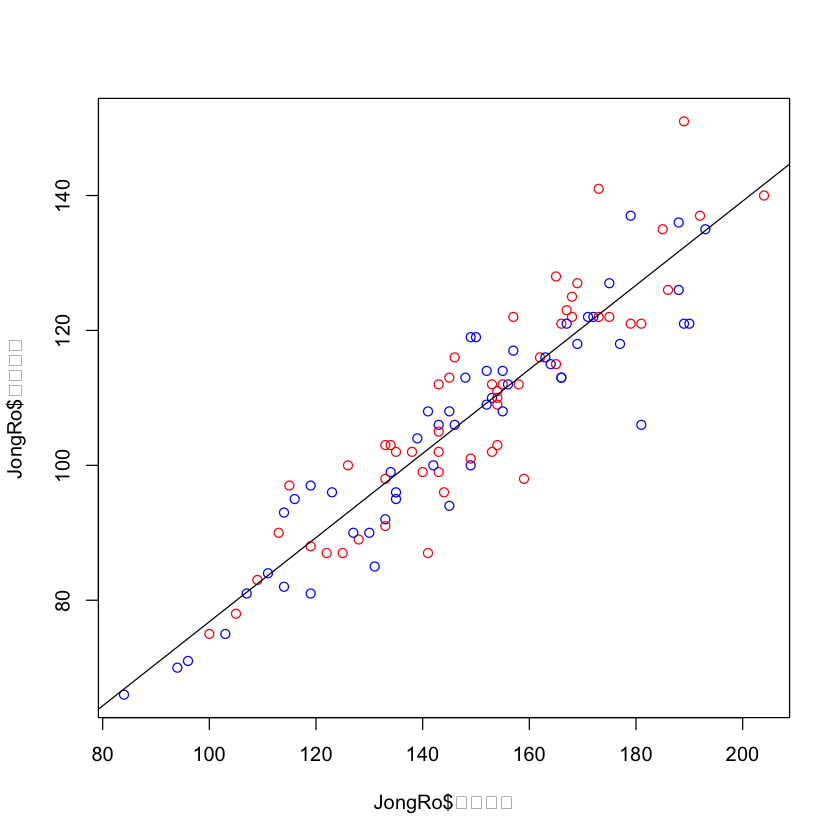

In [119]:
# 종로구의 발생건수와 부상자수의 산포도와 회귀선 그리기
 options(warn = -1)


plot(JongRo$발생건수 ~ JongRo$부상자수,
    col = c("red","blue")
    )
r <- lm(JongRo$발생건수 ~ JongRo$부상자수)
abline(r, col= "black")
r

In [120]:
# 예측력
model <- lm(부상자수 ~ 발생건수, data = JongRo)
model


Call:
lm(formula = 부상자수 ~ 발생건수, data = JongRo)

Coefficients:
(Intercept)     발생건수  
      2.886        1.360  


In [129]:
summary(model)


Call:
lm(formula = 부상자수 ~ 발생건수, data = JongRo)

Residuals:
    Min      1Q  Median      3Q     Max 
-21.637  -5.949  -0.019   5.301  33.961 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.88612    6.05535   0.477    0.635    
발생건수     1.35993    0.05591  24.322   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 9.816 on 106 degrees of freedom
Multiple R-squared:  0.848,	Adjusted R-squared:  0.8466 
F-statistic: 591.6 on 1 and 106 DF,  p-value: < 2.2e-16


In [130]:
# 회귀식
# - 발생건수가 100건일 경우의 부상자수 예측
1.360 * 100 + 2.886 

[1] 138.886

In [142]:
# 랜덤포레스트로 예측
# - 발생건수가 100건일 경우 부상자수 예측

model.rf <- randomForest(부상자수 ~ 발생건수 , data = JongRo, ntree = 1000)
발생건수 = 100
x <- data.frame(발생건수)
predict(model.rf, x)

1 
139.2859